# Préliminaire

In [52]:
import pandas as pd
import re
pd.set_option('display.max_columns', None)
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [53]:
df = pd.read_csv('regularite-mensuelle-tgv-aqst.csv',delimiter=';')

In [54]:
df

,date,service,gare_depart,gare_arrivee,duree_moyenne,nb_train_prevu,nb_annulation,commentaire_annulation,nb_train_depart_retard,retard_moyen_depart,retard_moyen_tous_trains_depart,commentaire_retards_depart,nb_train_retard_arrivee,retard_moyen_arrivee,retard_moyen_tous_trains_arrivee,commentaires_retard_arrivee,nb_train_retard_sup_15,retard_moyen_trains_retard_sup15,nb_train_retard_sup_30,nb_train_retard_sup_60,prct_cause_externe,prct_cause_infra,prct_cause_gestion_trafic,prct_cause_materiel_roulant,prct_cause_gestion_gare,prct_cause_prise_en_charge_voyageurs
0,2018-01,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,141,870,5,NaN,289,11.247809,3.693179,NaN,147,28.436735,6.511118,NaN,110,6.511118,44,8,36.134454,31.092437,10.924370,15.966387,5.042017,0.840336
1,2018-01,National,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165,222,0,NaN,8,2.875000,0.095796,NaN,34,21.524020,5.696096,NaN,22,5.696096,5,0,15.384615,30.769231,38.461538,11.538462,3.846154,0.000000
2,2018-01,National,PARIS MONTPARNASSE,QUIMPER,220,248,1,NaN,37,9.501351,1.003981,NaN,26,55.692308,7.578947,"Ce mois-ci, l'OD a été touchée par les inciden...",26,7.548387,17,7,26.923077,38.461538,15.384615,19.230769,0.000000,0.000000
3,2018-01,National,PARIS MONTPARNASSE,ST MALO,156,102,0,NaN,12,19.912500,1.966667,NaN,13,48.623077,6.790686,"Ce mois-ci, l'OD a été touchée par les inciden...",8,6.724757,6,4,23.076923,46.153846,7.692308,15.384615,7.692308,0.000000
4,2018-01,National,PARIS MONTPARNASSE,ST PIERRE DES CORPS,61,391,2,NaN,61,7.796995,0.886889,NaN,71,12.405164,3.346487,NaN,17,3.346487,6,0,21.212121,42.424242,9.090909,21.212121,6.060606,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8149,2023-06,National,STRASBOURG,PARIS EST,114,492,2,NaN,273,11.989927,6.742041,NaN,105,30.157302,7.689898,NaN,80,35.446667,31,10,7.619048,5.714286,55.238095,18.095238,7.619048,5.714286
8150,2023-06,National,TOULOUSE MATABIAU,PARIS MONTPARNASSE,273,215,0,NaN,24,28.730556,3.181240,NaN,36,76.688889,14.824264,NaN,36,76.688889,24,10,13.888889,33.333333,8.333333,19.444444,8.333333,16.666667
8151,2023-06,National,TOURS,PARIS MONTPARNASSE,78,192,1,NaN,20,31.281667,3.276353,NaN,32,45.841146,8.650349,NaN,13,97.394872,7,5,14.285714,21.428571,28.571429,21.428571,3.571429,10.714286
8152,2023-06,National,VALENCE ALIXAN TGV,PARIS LYON,133,440,2,NaN,347,13.517051,10.271499,NaN,116,41.487213,12.765753,NaN,96,47.424479,62,22,26.724138,19.827586,27.586207,7.758621,7.758621,10.344828


In [55]:
# Retard en pourcentage au lieu de minutes

df = df[df["duree_moyenne"] > 0] #73 lignes n'obéissent pas à cette condition
df["retard_moyen_arrivee"] = (df["retard_moyen_arrivee"] / df["duree_moyenne"]) * 100

/var/folders/3t/8gk5rj317k13yrxrx02477g80000gn/T/ipykernel_87270/3959792411.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["retard_moyen_arrivee"] = (df["retard_moyen_arrivee"] / df["duree_moyenne"]) * 100


In [20]:
df

,date,service,gare_depart,gare_arrivee,duree_moyenne,nb_train_prevu,nb_annulation,commentaire_annulation,nb_train_depart_retard,retard_moyen_depart,retard_moyen_tous_trains_depart,commentaire_retards_depart,nb_train_retard_arrivee,retard_moyen_arrivee,retard_moyen_tous_trains_arrivee,commentaires_retard_arrivee,nb_train_retard_sup_15,retard_moyen_trains_retard_sup15,nb_train_retard_sup_30,nb_train_retard_sup_60,prct_cause_externe,prct_cause_infra,prct_cause_gestion_trafic,prct_cause_materiel_roulant,prct_cause_gestion_gare,prct_cause_prise_en_charge_voyageurs
0,2018-01,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,141,870,5,NaN,289,11.247809,3.693179,NaN,147,20.167897,6.511118,NaN,110,6.511118,44,8,36.134454,31.092437,10.924370,15.966387,5.042017,0.840336
1,2018-01,National,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165,222,0,NaN,8,2.875000,0.095796,NaN,34,13.044860,5.696096,NaN,22,5.696096,5,0,15.384615,30.769231,38.461538,11.538462,3.846154,0.000000
2,2018-01,National,PARIS MONTPARNASSE,QUIMPER,220,248,1,NaN,37,9.501351,1.003981,NaN,26,25.314685,7.578947,"Ce mois-ci, l'OD a été touchée par les inciden...",26,7.548387,17,7,26.923077,38.461538,15.384615,19.230769,0.000000,0.000000
3,2018-01,National,PARIS MONTPARNASSE,ST MALO,156,102,0,NaN,12,19.912500,1.966667,NaN,13,31.168639,6.790686,"Ce mois-ci, l'OD a été touchée par les inciden...",8,6.724757,6,4,23.076923,46.153846,7.692308,15.384615,7.692308,0.000000
4,2018-01,National,PARIS MONTPARNASSE,ST PIERRE DES CORPS,61,391,2,NaN,61,7.796995,0.886889,NaN,71,20.336335,3.346487,NaN,17,3.346487,6,0,21.212121,42.424242,9.090909,21.212121,6.060606,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8149,2023-06,National,STRASBOURG,PARIS EST,114,492,2,NaN,273,11.989927,6.742041,NaN,105,26.453773,7.689898,NaN,80,35.446667,31,10,7.619048,5.714286,55.238095,18.095238,7.619048,5.714286
8150,2023-06,National,TOULOUSE MATABIAU,PARIS MONTPARNASSE,273,215,0,NaN,24,28.730556,3.181240,NaN,36,28.091168,14.824264,NaN,36,76.688889,24,10,13.888889,33.333333,8.333333,19.444444,8.333333,16.666667
8151,2023-06,National,TOURS,PARIS MONTPARNASSE,78,192,1,NaN,20,31.281667,3.276353,NaN,32,58.770700,8.650349,NaN,13,97.394872,7,5,14.285714,21.428571,28.571429,21.428571,3.571429,10.714286
8152,2023-06,National,VALENCE ALIXAN TGV,PARIS LYON,133,440,2,NaN,347,13.517051,10.271499,NaN,116,31.193393,12.765753,NaN,96,47.424479,62,22,26.724138,19.827586,27.586207,7.758621,7.758621,10.344828


In [67]:
#Utils

def select_test_data(data):
    data['date'] = data['date'].str.strip()  # Remove leading/trailing spaces if any

    # Define the regular expression pattern
    pattern = re.compile(r'^2023-\d{2}$', re.IGNORECASE)

    # Filter rows with the desired date format
    test_data = data[data['date'].str.contains(pattern, na=False)]
    return test_data

def select_train_data(data,test_data):
    # Find the indices of rows in 'data' that are not in 'test_data'
    indices_to_keep = ~data.index.isin(test_data.index)

    # Create the 'train_data' DataFrame by selecting rows from 'data' using the indices to keep
    train_data = data[indices_to_keep].reset_index(drop=True)
    return train_data


# Splitting data into features and labels
def split_data(df, drop_columns, target_column):
	X = df.drop(columns = drop_columns + [target_column])

	y0 = df[target_column]

	y1 = df[['prct_cause_externe', 'prct_cause_infra', 'prct_cause_gestion_trafic', 'prct_cause_materiel_roulant',\
			'prct_cause_gestion_gare', 'prct_cause_prise_en_charge_voyageurs']]

	return X, y0, y1

#Sppliting 'date' and O-H encoding
def date_service_proccess(train_data, test_data):
    df = pd.concat([train_data, test_data], axis=0)
    df[['année', 'mois']] = df['date'].str.split('-', expand=True) 
    df = df.drop(columns =['date', 'année'])

    df = pd.get_dummies(df, columns=['service', 'gare_depart', 'gare_arrivee'], dtype=int)

    train_data_encoded = df[:len(train_data)]
    test_data_encoded = df[len(train_data):]
    return train_data_encoded, test_data_encoded

# Niveau de réstriction & Séparation des données train/test

Niveaux de restriction: <br>
	0- Tout laisser (sans les pourcentages) <br>
	1- Enlever l’autre colonne retard <br>
	2- + Enlever les colonnes: nb_train_retard_sup15 , retard_moyen_trains_retard_sup_15 , nb_train_retard_sup_30 , nb_train_retard_sup_60 <br>
	3- + Enlever les colonnes: nb_train_retard_arrivee <br>
	4- + Enlever les colonnes: nb_train_retard_depart , retard_moyen_depart , retard_moyen_tous_trains_depart <br>
	5- + Enlever les colonnes: nb_annulation <br>

In [68]:
target_column = 'retard_moyen_arrivee'

remove_columns_0 = ['prct_cause_externe', 'prct_cause_infra', 'prct_cause_gestion_trafic',
'prct_cause_materiel_roulant', 'prct_cause_gestion_gare', 'prct_cause_prise_en_charge_voyageurs', 'commentaire_annulation', 'commentaire_retards_depart', 'commentaires_retard_arrivee']
remove_columns_1 = remove_columns_0 + ['retard_moyen_tous_trains_arrivee']
remove_columns_2 = remove_columns_1 + ['nb_train_retard_sup_15' , 'retard_moyen_trains_retard_sup15' , 'nb_train_retard_sup_30' , 'nb_train_retard_sup_60']
remove_columns_3 = remove_columns_2 + ['nb_train_retard_arrivee']
remove_columns_4 = remove_columns_3 + ['nb_train_depart_retard' , 'retard_moyen_depart' , 'retard_moyen_tous_trains_depart']
remove_columns_5 = remove_columns_4 + ['nb_annulation']

In [86]:
remove_columns = remove_columns_0

In [87]:
#the test data before preprocessing
test_data=select_test_data(df)
test_data.head()

# The training data before preprocessing
train_data = select_train_data(df, test_data)
train_data.head()

train_data_encoded, test_data_encoded = date_service_proccess(train_data, test_data)

X_train, y0_train, y1_train = split_data(train_data_encoded, remove_columns, target_column)
X_test, y0_test, y1_test = split_data(test_data_encoded, remove_columns, target_column)

/var/folders/3t/8gk5rj317k13yrxrx02477g80000gn/T/ipykernel_87270/4159822117.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = data['date'].str.strip()  # Remove leading/trailing spaces if any


# Régression Linéaire

In [88]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y0_train)

LinearRegression()

In [89]:
#Dans le cas où on prédit le retard en pourcentage, cette fonction permet d'évaluer 
#l'erreur en minutes afin de pouvoir comparer les performances.

def score_on_minutes(reg, X, y, score):
    Xi = X.reset_index(drop=True)
    pred = pd.DataFrame(reg.predict(Xi), columns=["retard_moyen_arrivee"])
    pred["retard_moyen_arrivee"] = (pred["retard_moyen_arrivee"] / 100) * Xi["duree_moyenne"]
    real = pd.DataFrame(y, columns=["retard_moyen_arrivee"]).reset_index(drop=True)
    real["retard_moyen_arrivee"] = (real["retard_moyen_arrivee"] / 100) * Xi["duree_moyenne"]
    return score(real, pred)

In [119]:
print("R2 sur %:")
print(f'    Training : {r2_score(y0_train, reg.predict(X_train)):.3f}')
print(f'    Test     : {r2_score(y0_test, reg.predict(X_test)):.3f}')
print("")
print("R2 sur Minutes:")
print(f'    Training : {score_on_minutes(reg, X_train, y0_train, r2_score):.3f}')
print(f'    Test     : {score_on_minutes(reg, X_test, y0_test, r2_score):.3f}')

print("RMSE sur Minutes:")
print(f'    Training : {np.sqrt(score_on_minutes(reg, X_train, y0_train, mean_squared_error)):.3f}')
print(f'    Test     : {np.sqrt(score_on_minutes(reg, X_test, y0_test, mean_squared_error)):.3f}')

print("MAE sur Minutes:")
print(f'    Training : {score_on_minutes(reg, X_train, y0_train, mean_absolute_error):.3f}')
print(f'    Test     : {score_on_minutes(reg, X_test, y0_test, mean_absolute_error):.3f}')
print("")

R2 sur %:
    Training : 0.675
    Test     : 0.772

R2 sur Minutes:
    Training : 0.275
    Test     : 0.682
RMSE sur Minutes:
    Training : 12.729
    Test     : 10.648
MAE sur Minutes:
    Training : 6.434
    Test     : 6.692



# Régression Linéaire Ridge

In [102]:
regr = linear_model.Ridge()
regr.fit(X_train, y0_train)

Ridge()

In [120]:
print("R2 sur %:")
print(f'    Training : {r2_score(y0_train, regr.predict(X_train)):.3f}')
print(f'    Test     : {r2_score(y0_test, regr.predict(X_test)):.3f}')
print("")
print("R2 sur Minutes:")
print(f'    Training : {score_on_minutes(regr, X_train, y0_train, r2_score):.3f}')
print(f'    Test     : {score_on_minutes(regr, X_test, y0_test, r2_score):.3f}')

print("RMSE sur Minutes:")
print(f'    Training : {np.sqrt(score_on_minutes(regr, X_train, y0_train, mean_squared_error)):.3f}')
print(f'    Test     : {np.sqrt(score_on_minutes(regr, X_test, y0_test, mean_squared_error)):.3f}')

print("MAE sur Minutes:")
print(f'    Training : {score_on_minutes(regr, X_train, y0_train, mean_absolute_error):.3f}')
print(f'    Test     : {score_on_minutes(regr, X_test, y0_test, mean_absolute_error):.3f}')
print("")

R2 sur %:
    Training : 0.675
    Test     : 0.771

R2 sur Minutes:
    Training : 0.275
    Test     : 0.683
RMSE sur Minutes:
    Training : 12.732
    Test     : 10.641
MAE sur Minutes:
    Training : 6.427
    Test     : 6.684



# Toujours prédire la valeur moyenne du % de retard
Retard = Duree moyenne * 22,8% 

In [287]:
mean = float(y0_train.mean())

In [288]:
mean

22.813599345828084

In [293]:
pred = X_test["duree_moyenne"] * (mean / 100)
true = (y0_test["retard_moyen_arrivee"] / 100) * X_test["duree_moyenne"]

In [311]:
mean_absolute_error(true, pred)

13.510396660707869

# Benchmark sur tous les choix de réstriction

## Prédiction du retard en minutes

In [143]:
df = pd.read_csv('regularite-mensuelle-tgv-aqst.csv',delimiter=';')
df = df[df["duree_moyenne"] > 0] #73 lignes n'obéissent pas à cette condition
#df["retard_moyen_arrivee"] = (df["retard_moyen_arrivee"] / df["duree_moyenne"]) * 100

In [144]:
restriction_level = [remove_columns_0, remove_columns_1, remove_columns_2, remove_columns_3, remove_columns_4, remove_columns_5]
restriction_plot = []
r2_plot = []
rmse_plot = []
mae_plot = []
for i in range(6):
    print("Niveau de restriction ", i, ":")
    drop_columns = restriction_level[i]

    test_data=select_test_data(df)
    train_data = select_train_data(df, test_data)
    train_data_encoded, test_data_encoded = date_service_proccess(train_data, test_data)

    X_train, y0_train, y1_train = split_data(train_data_encoded, drop_columns, target_column)
    X_test, y0_test, y1_test = split_data(test_data_encoded, drop_columns, target_column)

    reg = linear_model.LinearRegression()
    reg.fit(X_train, y0_train)

    print("R2:")
    print(f'    Training : {r2_score(y0_train, reg.predict(X_train)):.3f}')
    print(f'    Test     : {r2_score(y0_test, reg.predict(X_test)):.3f}')
    print("RMSE:")
    print(f'    Training : {np.sqrt(mean_squared_error(y0_train, reg.predict(X_train))):.3f}')
    print(f'    Test     : {np.sqrt(mean_squared_error(y0_test, reg.predict(X_test))):.3f}')
    print("MAE:")
    print(f'    Training : {mean_absolute_error(y0_train, reg.predict(X_train)):.3f}')
    print(f'    Test     : {mean_absolute_error(y0_test, reg.predict(X_test)):.3f}')
    print("")
    restriction_plot.append(i)
    r2_plot.append(r2_score(y0_test, reg.predict(X_test)))
    rmse_plot.append(np.sqrt(mean_squared_error(y0_test, reg.predict(X_test))))
    mae_plot.append(mean_absolute_error(y0_test, reg.predict(X_test)))
        

Niveau de restriction  0 :
R2:
    Training : 0.597
    Test     : 0.649
RMSE:
    Training : 9.496
    Test     : 11.200
MAE:
    Training : 5.930
    Test     : 5.699

Niveau de restriction  1 :
R2:
    Training : 0.582
    Test     : 0.641
RMSE:
    Training : 9.672
    Test     : 11.312
MAE:
    Training : 6.087
    Test     : 5.752

Niveau de restriction  2 :
R2:
    Training : 0.324
    Test     : 0.192
RMSE:
    Training : 12.298
    Test     : 16.978
MAE:
    Training : 8.026
    Test     : 9.056

Niveau de restriction  3 :
R2:
    Training : 0.323
    Test     : 0.193
RMSE:
    Training : 12.301
    Test     : 16.973
MAE:
    Training : 8.030
    Test     : 9.058

Niveau de restriction  4 :
R2:
    Training : 0.234
    Test     : 0.072
RMSE:
    Training : 13.087
    Test     : 18.203
MAE:
    Training : 8.847
    Test     : 10.200

Niveau de restriction  5 :
R2:
    Training : 0.301
    Test     : 0.135
RMSE:
    Training : 12.506
    Test     : 17.569
MAE:
    Training : 8.2

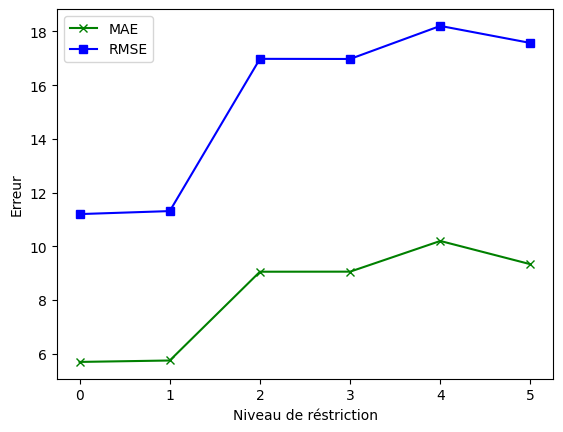

In [145]:
plt.plot(restriction_plot, mae_plot, marker='x', color='green', label='MAE')
plt.plot(restriction_plot, rmse_plot, marker='s', color='blue', label='RMSE')

plt.xlabel("Niveau de réstriction")
plt.ylabel("Erreur")
plt.legend()
plt.xticks(restriction_plot)

plt.show()

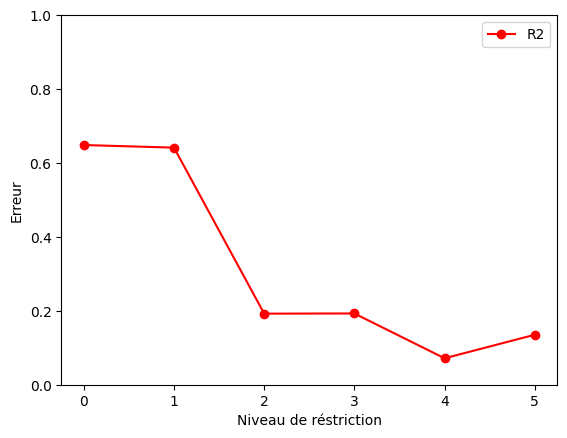

In [146]:
plt.plot(restriction_plot, r2_plot, marker='o', color='red', label='R2')

plt.xlabel("Niveau de réstriction")
plt.ylabel("Erreur")
plt.legend()
plt.xticks(restriction_plot)
plt.ylim(0, 1)

plt.show()

## Prédiction du retard en pourcentage

In [147]:
p_df = pd.read_csv('regularite-mensuelle-tgv-aqst.csv',delimiter=';')
p_df = p_df[p_df["duree_moyenne"] > 0] #73 lignes n'obéissent pas à cette condition
p_df["retard_moyen_arrivee"] = (p_df["retard_moyen_arrivee"] / p_df["duree_moyenne"]) * 100

In [148]:
restriction_level = [remove_columns_0, remove_columns_1, remove_columns_2, remove_columns_3, remove_columns_4, remove_columns_5]
restriction_plot = []
p_r2_plot = []
p_rmse_plot = []
p_mae_plot = []
for i in range(6):
    print("Niveau de restriction ", i, ":")
    drop_columns = restriction_level[i]

    test_data=select_test_data(p_df)
    train_data = select_train_data(p_df, test_data)
    train_data_encoded, test_data_encoded = date_service_proccess(train_data, test_data)

    X_train, y0_train, y1_train = split_data(train_data_encoded, drop_columns, target_column)
    X_test, y0_test, y1_test = split_data(test_data_encoded, drop_columns, target_column)

    reg = linear_model.LinearRegression()
    reg.fit(X_train, y0_train)

    print("R2:")
    print(f'    Training : {score_on_minutes(reg, X_train, y0_train, r2_score):.3f}')
    print(f'    Test     : {score_on_minutes(reg, X_test, y0_test, r2_score):.3f}')
    print("RMSE:")
    print(f'    Training : {np.sqrt(score_on_minutes(reg, X_train, y0_train, mean_squared_error)):.3f}')
    print(f'    Test     : {np.sqrt(score_on_minutes(reg, X_test, y0_test, mean_squared_error)):.3f}')
    print("MAE:")
    print(f'    Training : {score_on_minutes(reg, X_train, y0_train, mean_absolute_error):.3f}')
    print(f'    Test     : {score_on_minutes(reg, X_test, y0_test, mean_absolute_error):.3f}')
    print("")
    restriction_plot.append(i)
    p_r2_plot.append(score_on_minutes(reg, X_test, y0_test, r2_score))
    p_rmse_plot.append(np.sqrt(score_on_minutes(reg, X_test, y0_test, mean_squared_error)))
    p_mae_plot.append(score_on_minutes(reg, X_test, y0_test, mean_absolute_error))
        

Niveau de restriction  0 :
R2:
    Training : 0.275
    Test     : 0.682
RMSE:
    Training : 12.729
    Test     : 10.648
MAE:
    Training : 6.434
    Test     : 6.692

Niveau de restriction  1 :
R2:
    Training : 0.450
    Test     : 0.693
RMSE:
    Training : 11.089
    Test     : 10.470
MAE:
    Training : 6.445
    Test     : 6.589

Niveau de restriction  2 :
R2:
    Training : 0.206
    Test     : 0.198
RMSE:
    Training : 13.328
    Test     : 16.922
MAE:
    Training : 8.271
    Test     : 9.284

Niveau de restriction  3 :
R2:
    Training : 0.203
    Test     : 0.201
RMSE:
    Training : 13.347
    Test     : 16.882
MAE:
    Training : 8.288
    Test     : 9.278

Niveau de restriction  4 :
R2:
    Training : 0.059
    Test     : -0.042
RMSE:
    Training : 14.508
    Test     : 19.288
MAE:
    Training : 9.620
    Test     : 11.152

Niveau de restriction  5 :
R2:
    Training : 0.236
    Test     : 0.131
RMSE:
    Training : 13.069
    Test     : 17.616
MAE:
    Training : 

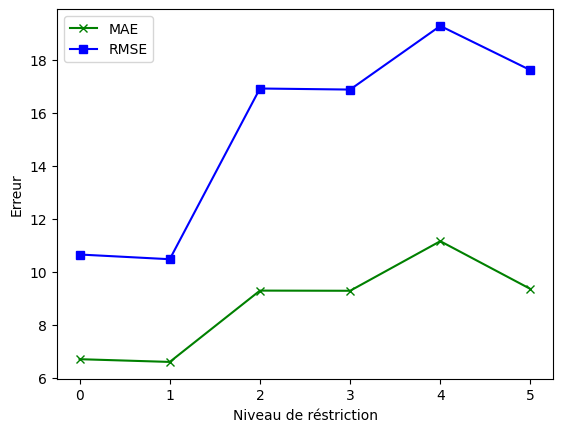

In [149]:
plt.plot(restriction_plot, p_mae_plot, marker='x', color='green', label='MAE')
plt.plot(restriction_plot, p_rmse_plot, marker='s', color='blue', label='RMSE')

plt.xlabel("Niveau de réstriction")
plt.ylabel("Erreur")
plt.legend()
plt.xticks(restriction_plot)

plt.show()

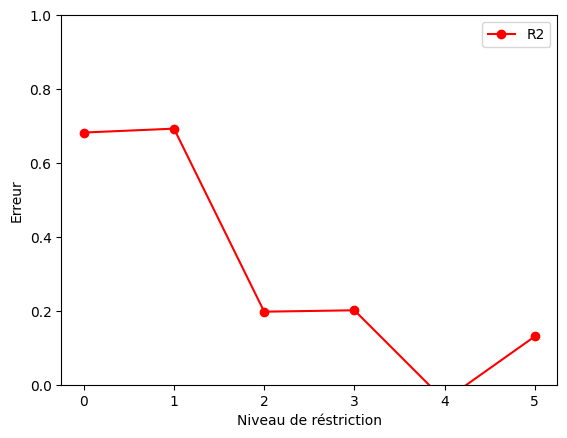

In [150]:
plt.plot(restriction_plot, p_r2_plot, marker='o', color='red', label='R2')

plt.xlabel("Niveau de réstriction")
plt.ylabel("Erreur")
plt.legend()
plt.xticks(restriction_plot)
plt.ylim(0, 1)

plt.show()

## Comparaison des résultats

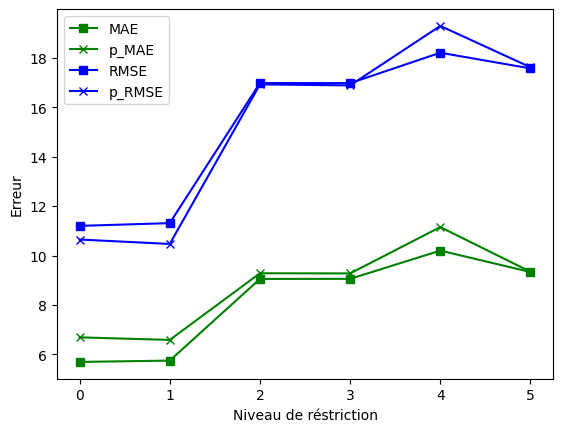

In [151]:
plt.plot(restriction_plot, mae_plot, marker='s', color='green', label='MAE')
plt.plot(restriction_plot, p_mae_plot, marker='x', color='green', label='p_MAE')

plt.plot(restriction_plot, rmse_plot, marker='s', color='blue', label='RMSE')
plt.plot(restriction_plot, p_rmse_plot, marker='x', color='blue', label='p_RMSE')


plt.xlabel("Niveau de réstriction")
plt.ylabel("Erreur")
plt.legend()
plt.xticks(restriction_plot)

plt.show()

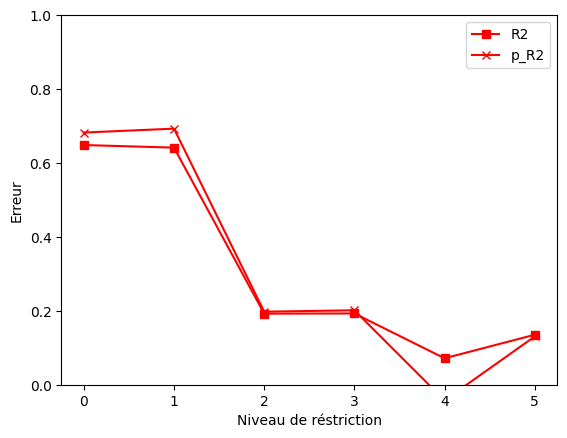

In [152]:
plt.plot(restriction_plot, r2_plot, marker='s', color='red', label='R2')
plt.plot(restriction_plot, p_r2_plot, marker='x', color='red', label='p_R2')

plt.xlabel("Niveau de réstriction")
plt.ylabel("Erreur")
plt.legend()
plt.xticks(restriction_plot)
plt.ylim(0, 1)

plt.show()